# Execute a workflow

A workflow is used to quantitatively evaluate an algorithm on a large set of time series. Here we show how to start a workflow from the code. Notice that all the configurations are dictionaries. Because of this, it is possible to pass a path to a `.json` file, which contains the configuration. More information can be found in the [documentation](https://u0143709.pages.gitlab.kuleuven.be/dtaianomaly/getting_started/large_scale_experiments.html).

In [1]:
from dtaianomaly.workflow import execute_algorithm
from dtaianomaly.data_management import DataManager
from dtaianomaly.anomaly_detection import PyODAnomalyDetector, Windowing

First we need to specify which time series to use. It is possible to select time series with specific features (e.g., at least 5 attributes). In particular, we select all datasets from the Demo-collection here. Additionally, we also need a `DataManager` to effectively read the data. 

In [2]:
data_manager = DataManager('../data/datasets.csv')
data_configuration = {
    'select': [
        {'collection_name': 'Demo'}
    ]
}

An algorithm configuration can be either a dictionary, which is then passed to the corresponding `load()` function of the correct anomaly detector, or it is a `TimeSeriesAnomalyDetector` object.  

In [3]:
anomaly_detector = PyODAnomalyDetector('IForest', Windowing(64))
anomaly_detector_name = 'IForest-window-size-64'

The metric configuration dictates which metrics to be computed. If the metric has certain parameters, then these can be passed under the `"metric_parameters"` key. If the metric can not cope with reel anomaly scores, some thresholding should be applied. This can be done by giving the `"thresholding_strategy"` and `"thresholding_parameters"` properties.

In [4]:
metric_configuration = {
    "roc_vus": { },
    "pr_vus": { },
    "fbeta": {
        # We do not need to provide the 'metric_parameters', because the default value for beta is 1
        "thresholding_strategy": "contamination",
        "thresholding_parameters": {
            "contamination": 0.1
        }
    },
    "fbeta_05": {
        "metric_name": "fbeta",
        "metric_parameters": {
            "beta": 0.5
        },
        "thresholding_strategy": "contamination",
        "thresholding_parameters": {
            "contamination": 0.1
        }
    },
    "fbeta_2": {
        "metric_name": "fbeta",
        "metric_parameters": {
            "beta": 2.0
        },
        "thresholding_strategy": "contamination",
        "thresholding_parameters": {
            "contamination": 0.1
        }
    }
}

Lastly, an output configuration is required. This is not important for algorithm execution itself, but rather for having an indication of what's happening while the workflow is happening. 

In [5]:
output_configuration = {
  "directory_path": "test_workflow",
  "verbose": True,

  "trace_time": True,
  "trace_memory": True,

  "print_results": False,
  "save_results": False,
  "results_file": "results.csv",

  "save_anomaly_scores_plot": True,
  "anomaly_scores_directory": "anomaly_score_plots",
  "anomaly_scores_file_format": "svg",
  "show_anomaly_scores": "overlay",
  "show_ground_truth": None,

  "invalid_train_type_raise_error": True
}

Now, we can execute the workflow simply as follows. 

>>> Starting the workflow
>>> Iterating over the datasets
Total number of datasets: 4
>>> Handling dataset '('Demo', 'Demo1')'
>> Checking  algorithm-dataset compatibility
>> Loading the train data
Using **test** data but no labels for unsupervised algorithm
>> Fitting the algorithm
>> Loading the test data
>> Predicting the decision scores on the test data
>> Storing the results
Computing the evaluation metrics metrics
Computing the evaluation metric 'roc_vus'
Evaluation: '0.998261204676718'
Computing the evaluation metric 'pr_vus'
Evaluation: '0.9921483782724378'
Computing the evaluation metric 'fbeta'
Evaluation: '0.4946236559139785'
Computing the evaluation metric 'fbeta_05'
Evaluation: '0.3795379537953795'
Computing the evaluation metric 'fbeta_2'
Evaluation: '0.7098765432098766'
Saving the timing information
Saving the memory usage
>> Saving the anomaly score plot
path: test_workflow/IForest-window-size-64/anomaly_score_plots/demo_demo1.svg
format: svg
show_anomaly_scores: overla

roc_vus    pr_vus     fbeta  fbeta_05  \
collection_name dataset_name                                           
Demo            Demo1         0.998261  0.992148  0.494624  0.379538   
                Demo2         0.990362  0.940127  0.321678  0.228628   
                Demo3         0.990736  0.954128   0.72679   0.62443   
                Demo4         0.937888   0.73223  0.530713  0.479148   

                               fbeta_2 Time fit (s) Time predict (s)  \
collection_name dataset_name                                           
Demo            Demo1         0.709877      0.74359          0.04283   
                Demo2         0.542453      0.77324          0.06435   
                Demo3         0.869289      0.79637          0.07584   
                Demo4         0.594714      0.67223          0.06033   

                             Peak memory fit (KiB) Peak memory predict (KiB)  
collection_name dataset_name                                                  
Demo            Demo1                   1688.52148                1080.83594  
                Demo2                   2422.26953                1883.67188  
                Demo3                   2398.25195                1883.67188  
                Demo4                   2419.40723                1883.67188

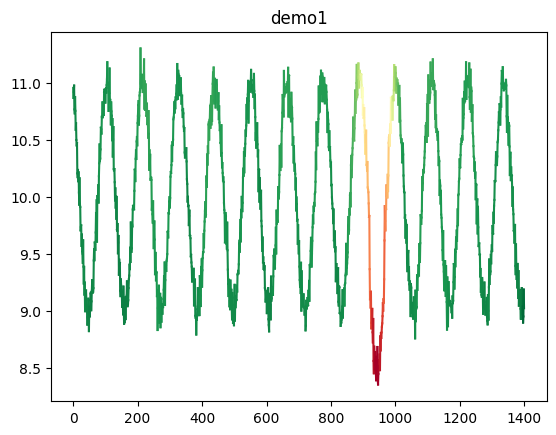

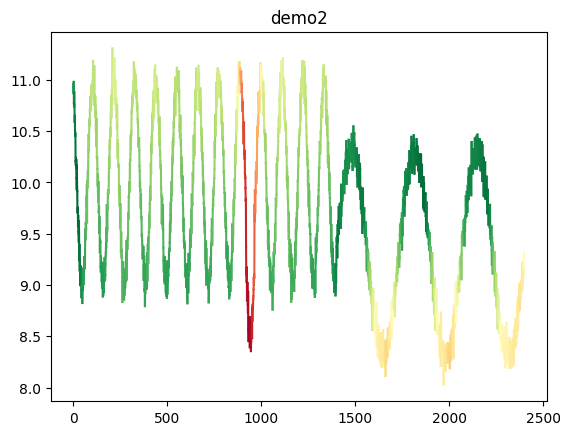

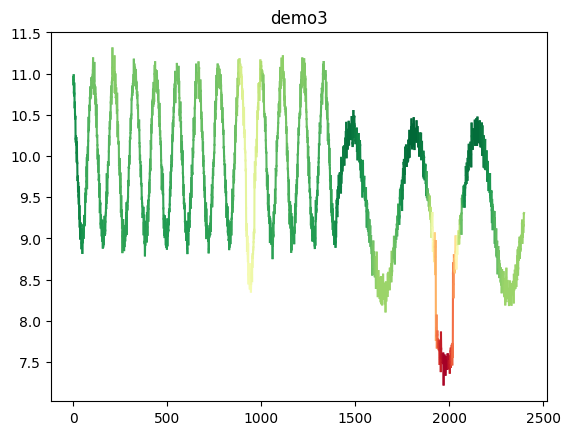

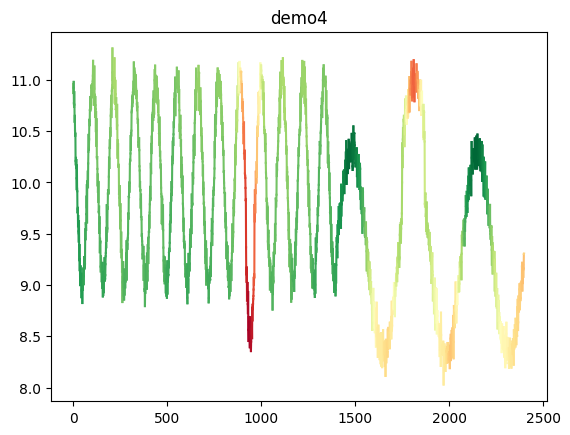

In [6]:
execute_algorithm(
    data_manager,
    data_configuration, 
    (anomaly_detector, anomaly_detector_name),
    metric_configuration,
    output_configuration
)

The workflow has been saved, but for now we will remove the results to clean up the directory.

In [7]:
import shutil
shutil.rmtree(output_configuration['directory_path'])